In [11]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
'''Input your files of standards and data. Formatting: standards(standard, metal_1, metal_2, metal_3), data(date, column, sample, metal_1, metal_2, metal_3) '''
'''Change indices below to match standards and data sheet formatting if necessary'''
standards = pd.read_csv('peakareas_220125.csv')
standards.set_index('ppt', inplace=True)
sampleareas=pd.read_csv('peakareas_corrected.csv')

          date            column  sample       pa_56Fe        pa_59Co  \
ppt                                                                     
100000  220125  biozen1.7peptide  100ppb   51504.09875  115202.038800   
200000  220125  biozen1.7peptide  200ppb  116482.54970  228926.265500   
25000   220125  biozen1.7peptide   25ppb   27403.75473   30492.834950   
50000   220125  biozen1.7peptide   50ppb   38241.73423   58441.206340   
0       220125  biozen1.7peptide  blank5   10707.09311     422.943208   

            pa_60Ni        pa_63Cu       pa_66Zn      pa_111Cd      pa_208Pb  \
ppt                                                                            
100000  38590.66891  120955.728100  16720.006620  29105.452740  7.084324e+05   
200000  76863.91995  243785.957900  31722.322360  58029.166700  1.448405e+06   
25000   11574.44541   33285.618840   4556.414458   8120.182456  1.987972e+05   
50000   20494.33177   62199.421350   8394.371447  15360.905410  3.729964e+05   
0       

<AxesSubplot:xlabel='ppt'>

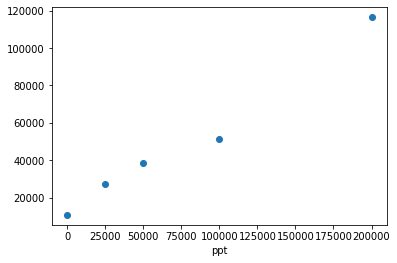

In [13]:
print (standards.head())
standards['pa_56Fe'].dropna().plot(marker='o', ls='')

pa_56Fe 
 slope = 0.50874632423 
 intercept = 10711.871786750002 
r =  0.9895045317277669 
 p =  0.001288699580572398 
 s =  0.042893970219497465
pa_59Co 
 slope = 1.1391376604375 
 intercept = 1261.7332266874873 
r =  0.9999792415557056 
 p =  1.1353367857332211e-07 
 s =  0.004237744252858565
pa_60Ni 
 slope = 0.37593953391 
 intercept = 1531.0423087499948 
r =  0.999868692281887 
 p =  1.8061785674515258e-06 
 s =  0.0035177119097559426
pa_63Cu 
 slope = 1.205438601815 
 intercept = 2015.8672188749915 
r =  0.9999401732807597 
 p =  5.554855189007774e-07 
 s =  0.0076131878641684655
pa_66Zn 
 slope = 0.15687086287359997 
 intercept = 576.8786070400001 
r =  0.9997307696195751 
 p =  5.302765415211826e-06 
 s =  0.0021020662337389597
pa_111Cd 
 slope = 0.28544506685800003 
 intercept = 861.7580508499996 
r =  0.9999560299830655 
 p =  3.4999830597000384e-07 
 s =  0.0015455019275105253
['pa_56Fe', 10711.871786750002, 0.50874632423, 'pa_59Co', 1261.7332266874873, 1.1391376604375, 'pa_

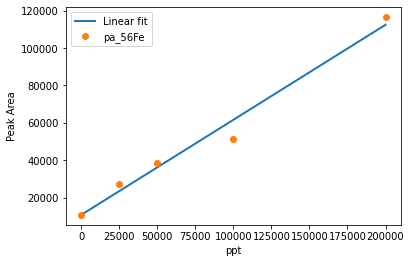

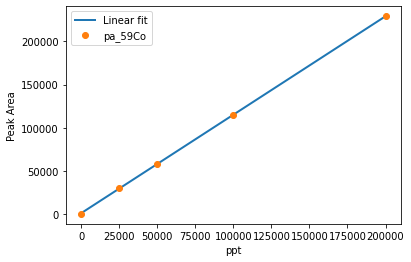

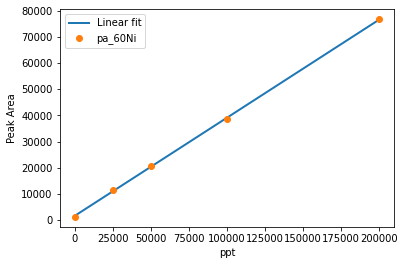

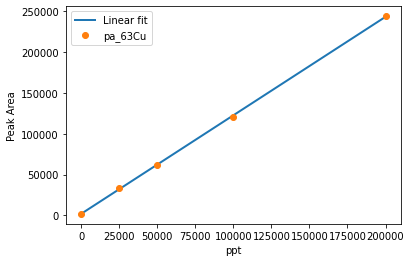

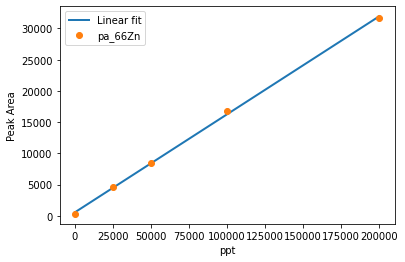

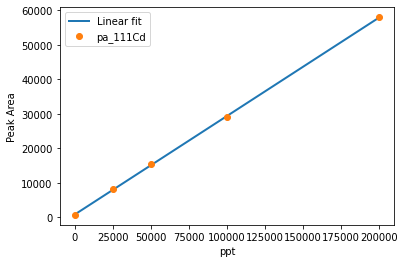

In [14]:
intercepts=[]
cols=['Metal','Sample','PPT']
ppt=[]
standards['ppt1']=standards.index
for metal in standards.iloc[1:5,3:9]:  #Change the .iloc indices to match your relevant sheet of standards!#
    y=np.array(standards[metal].dropna().values, dtype=float)
    x=np.array(standards['ppt1'].dropna().index.values, dtype=float)
    slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
    xf = np.linspace(min(x),max(x),100)
    xf1 = xf.copy()
    yf = (slope*xf)+intercept
    print(metal,'\n', 'slope =',slope, '\n','intercept =', intercept, '\n' 'r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

    '''Create dataframe of prediction results'''        
    for index,j in enumerate(sampleareas.loc[:,metal]):
        pred = (j-intercept/slope)
        sample=sampleareas['sample'][index]
        areas=ppt.append([metal,sample,pred])

    '''Create a table of intercepts'''
    intercepts.append(metal)
    intercepts.append(intercept)
    intercepts.append(slope)

    '''Graph Standard Curves'''
    f, ax = plt.subplots(1, 1)
    ax.plot(xf1, yf,label='Linear fit', lw=2)
    standards[metal].dropna().plot(ax=ax,marker='o', ls='')
    plt.ylabel('Peak Area')
    ax.legend()

print(intercepts)
results=pd.DataFrame(ppt,columns=cols)
#print(ppt)
#results=pd.DataFrame(ppt)
#results=pd.merge(sample,areas,left_index=True, right_index=True)

In [15]:
results
#results.to_csv(r'ppt.csv', index=False)

,Metal,Sample,PPT
0,pa_56Fe,poolsample01,3557.469314
1,pa_56Fe,poolsample02,3906.500326
2,pa_56Fe,qH2Oblank,8592.346494
3,pa_56Fe,sample14,9308.144327
4,pa_56Fe,sample15,8301.809180
...,...,...,...
223,pa_111Cd,sample87,15075.742425
224,pa_111Cd,sample90,14928.127274
225,pa_111Cd,sample97,16423.127485
226,pa_111Cd,sample98,16337.109499


In [16]:
results.loc[results['Metal'] == 'pa_56Fe', 'Molarity'] = results.PPT * (1/((10**9)*55.845))
results.loc[results['Metal'] == 'pa_59Co', 'Molarity'] = results.PPT * (1/((10**9)*58.9332))
results.loc[results['Metal'] == 'pa_60Ni', 'Molarity'] = results.PPT * (1/((10**9)*58.6934))
results.loc[results['Metal'] == 'pa_63Cu', 'Molarity'] = results.PPT * (1/((10**9)*63.55))
results.loc[results['Metal'] == 'pa_66Zn', 'Molarity'] = results.PPT * (1/((10**9)*63.929142))
results.loc[results['Metal'] == 'pa_111Cd', 'Molarity'] = results.PPT * (1/((10**9)*112.4110))

In [18]:
sorted_results=results.sort_values(by='Sample')


In [19]:
sorted_results

,Metal,Sample,PPT,Molarity
113,pa_60Ni,Stdmix,26415.544696,4.500599e-07
189,pa_66Zn,Stdmix,-453.832170,-7.098987e-09
151,pa_63Cu,Stdmix,15522.384785,2.442547e-07
75,pa_59Co,Stdmix,275345.190342,4.672157e-06
37,pa_56Fe,Stdmix,124314.568917,2.226064e-06
...,...,...,...,...
226,pa_111Cd,sample98,16337.109499,1.453337e-07
112,pa_60Ni,sample98,38966.746612,6.639034e-07
188,pa_66Zn,sample98,5275.788016,8.252556e-08
150,pa_63Cu,sample98,225375.732020,3.546432e-06


In [20]:
sorted_results.to_csv(r'linear_regression_prediction_results.csv', index=False)